In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import openpyxl 
import os

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind as ttest
from sklearn.metrics import mean_squared_error
import time

In [30]:
from load_data import load_processed_general_data
from load_data import load_processed_society_data
from load_data import load_processed_quality_of_life_data

In [31]:
def MinMaxNormal(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true=np.array(y_true)
    y_pred=np.array(y_pred)
    MSPE = (sum((MinMaxNormal(y_pred)-MinMaxNormal(y_true))**2)/(y_pred.size))/(MinMaxNormal(y_true).mean())
    MSPE = MSPE*100
    return np.abs(MSPE)

In [33]:
median_houses_2020,lower_quatile_houses_2020,A_B_property_counts,C_D_property_counts,E_F_property_counts,G_H_property_counts,local_authority_names = load_processed_general_data()
worksheet,lower_quatile_earning_2020,ratio_by_lower_quatile_2020,median_earning_2020,ratio_by_medians_2020,month_rent_higher_quatile,month_rent_lower_quatile,total_threaten_homeless,violence_crime_ratio,sexual_crime_ratio,robbery_crime_ratio,theft_crime_ratio,damage_arson_crime_ratio,drug_crime_ratio,other_crime_ratio,employment_data,male_life_expectency,female_life_expectency,total_households_2020,households_with_children_ratio,one_female_households_ratio,one_male_households_ratio,pop_under_10_ratio,pop_teenager_ratio,pop_20_39_ratio,pop_40_60_ratio,pop_60_80_ratio,pop_80_90_ratio,total_population_2020,size_of_la_area = load_processed_society_data()
taxi_only_licensed_drivers,total_drivers,education_sector_size,health_sector_size,art_and_entertainment_sector_size,retail_sector_size = load_processed_quality_of_life_data()

In [34]:
worksheet.columns

Index(['Local Authority code', 'Local Authority name',
       'Violence against the person ratio', 'Sexual offences ratio',
       'Robbery ratio', 'Theft offences ratio',
       'Criminal damage and arson ratio', 'Drug offences ratio',
       'Other Crime Ratio', 'Total Employee All (thousands)',
       'Male life expectancy at birth (2012/2020)4',
       'Female life expectancy at birth (2020)4', 'Median', 'Lower quartile',
       'total_hoseholds_projected_2020',
       'Year 2020: Households with dependent children ratio',
       'Year 2020: One person households: Female ratio',
       'Year 2020: One person households: Male ratio', 'pop_ratio_under_10',
       'pop_ratio_teenager', 'pop_ratio_20_39', 'pop_ratio_40_60',
       'pop_ratio_60_80', 'pop_ratio_80_90+', 'POP All ages',
       'Total area as at 31 December 2020 (Hectares)', 'median_houses_2020',
       'median_earning_2020', 'ratio_by_medians_2020',
       'lower_quatile_houses_2020', 'lower_quatile_earning_2020',
      

In [35]:
quality_of_life_dataframe = pd.DataFrame([worksheet['median_houses_2020'],worksheet['Education'],worksheet['Arts, entertainment, recreation & other services'],worksheet['Year 2020: One person households: Female ratio'],worksheet['Year 2020: One person households: Male ratio'],worksheet['Year 2020: Households with dependent children ratio'],worksheet['pop_ratio_under_10'],worksheet['pop_ratio_teenager'],worksheet['pop_ratio_20_39'],worksheet['pop_ratio_40_60'],worksheet['pop_ratio_60_80'],worksheet['pop_ratio_80_90+']])
quality_of_life_dataframe = quality_of_life_dataframe.transpose()

In [53]:
taxi_only_licensed_drivers_ratio = taxi_only_licensed_drivers/total_households_2020
taxi_only_licensed_drivers_ratio = taxi_only_licensed_drivers_ratio.astype('float')
taxi_only_licensed_drivers_ratio = pd.DataFrame(taxi_only_licensed_drivers_ratio)
taxi_only_licensed_drivers_ratio.columns=['taxi_only_licensed_drivers_ratio_to_households']

total_drivers_ratio = total_drivers/total_households_2020
total_drivers_ratio = total_drivers_ratio.astype('float')
total_drivers_ratio = pd.DataFrame(total_drivers_ratio)
total_drivers_ratio.columns=['total_drivers_ratio_to_households']

health_sector_size_ratio = health_sector_size/total_households_2020
health_sector_size_ratio = health_sector_size_ratio.astype('float')
health_sector_size_ratio = pd.DataFrame(health_sector_size_ratio)
health_sector_size_ratio.columns=['health_sector_size_ratio_to_households']

retail_sector_size_ratio = retail_sector_size/total_households_2020
retail_sector_size_ratio = retail_sector_size_ratio.astype('float')
retail_sector_size_ratio = pd.DataFrame(retail_sector_size_ratio)
retail_sector_size_ratio.columns=['retail_sector_size_ratio_to_households']

In [65]:
pd.DataFrame([retail_sector_size_ratio['retail_sector_size_ratio_to_households'],retail_sector_size_ratio['retail_sector_size_ratio_to_households']])

,0,1,2,3,4,5,6,7,8,9,...,337,338,339,340,341,342,343,344,345,346
retail_sector_size_ratio_to_households,0.006205,0.008492,0.005744,0.007637,0.009737,0.006174,0.006343,0.007745,0.005315,0.009105,...,0.004959,0.004411,0.006452,0.005264,0.007123,0.00655,0.007119,0.008342,0.006359,0.006484
retail_sector_size_ratio_to_households,0.006205,0.008492,0.005744,0.007637,0.009737,0.006174,0.006343,0.007745,0.005315,0.009105,...,0.004959,0.004411,0.006452,0.005264,0.007123,0.00655,0.007119,0.008342,0.006359,0.006484


In [66]:
daily_life_dataframe = pd.DataFrame([worksheet['median_houses_2020'],health_sector_size_ratio['health_sector_size_ratio_to_households'],retail_sector_size_ratio['retail_sector_size_ratio_to_households'],taxi_only_licensed_drivers_ratio['taxi_only_licensed_drivers_ratio_to_households'],total_drivers_ratio['total_drivers_ratio_to_households'],A_B_property_counts,C_D_property_counts,E_F_property_counts,G_H_property_counts,male_life_expectency,female_life_expectency])
daily_life_dataframe = daily_life_dataframe.transpose()

In [67]:
social_space_dataframe = pd.DataFrame([worksheet['median_houses_2020'],worksheet['Robbery ratio'],worksheet['Theft offences ratio'],worksheet['Criminal damage and arson ratio'],worksheet['Drug offences ratio'],worksheet['Total Employee All (thousands)'],worksheet['Total_Threaten_or_is_Homeless']])
social_space_dataframe = social_space_dataframe.transpose()

In [72]:
personal_space = quality_of_life_dataframe.iloc[:, quality_of_life_dataframe.columns != 'median_houses_2020'].astype('float')
personal_class = quality_of_life_dataframe.iloc[:, quality_of_life_dataframe.columns == 'median_houses_2020'].astype('int')

daily_space = daily_life_dataframe.iloc[:, daily_life_dataframe.columns != 'median_houses_2020'].astype('float')
daily_class = daily_life_dataframe.iloc[:, daily_life_dataframe.columns == 'median_houses_2020'].astype('int')

social_space = social_space_dataframe.iloc[:, social_space_dataframe.columns != 'median_houses_2020'].astype('float')
social_class = social_space_dataframe.iloc[:, social_space_dataframe.columns == 'median_houses_2020'].astype('int')

In [73]:
################
pl_training_set, pl_test_set, pl_class_set, test_pl_class_set = train_test_split(personal_space,
                                                                    personal_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

# Cleaning test sets to avoid future warning messages
normal_pl_class_set = pl_class_set
pl_class_set = normal_pl_class_set.values.ravel() 
normal_test_pl_class_set = test_pl_class_set
test_pl_class_set = normal_test_pl_class_set.values.ravel() 

################
dl_training_set, dl_test_set, dl_class_set, test_dl_class_set = train_test_split(daily_space,
                                                                    daily_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

# Cleaning test sets to avoid future warning messages
normal_dl_class_set = dl_class_set
dl_class_set = normal_dl_class_set.values.ravel() 
normal_test_dl_class_set = test_dl_class_set
test_dl_class_set = normal_test_dl_class_set.values.ravel() 

################
sl_training_set, sl_test_set, sl_class_set, test_sl_class_set = train_test_split(social_space,
                                                                    social_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

# Cleaning test sets to avoid future warning messages
normal_sl_class_set = sl_class_set
sl_class_set = normal_sl_class_set.values.ravel() 
normal_test_sl_class_set = test_sl_class_set
test_sl_class_set = normal_test_sl_class_set.values.ravel() 

In [100]:
# Set the random state for reproducibility
pl_fit_rf = RandomForestClassifier(random_state=0)
dl_fit_rf = RandomForestClassifier(random_state=0)
sl_fit_rf = RandomForestClassifier(random_state=0)

In [101]:
np.random.seed(0)
start = time.time()

param_dist = {'max_depth': range(2,10+1),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(pl_fit_rf, cv = 7,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(pl_training_set, pl_class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': None}
Time taken in grid search:  176.30


In [102]:
np.random.seed(0)
start = time.time()

param_dist = {'max_depth': range(2,10+1),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(dl_fit_rf, cv = 7,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(dl_training_set, dl_class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto'}
Time taken in grid search:  168.42


In [103]:
np.random.seed(0)
start = time.time()

param_dist = {'max_depth': range(2,10+1),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(sl_fit_rf, cv = 7,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(sl_training_set, sl_class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': None}
Time taken in grid search:  135.50


In [129]:
# Set best parameters given by grid search 
pl_fit_rf = pl_fit_rf.set_params(n_estimators=400,criterion = 'gini',
                  max_features = None, 
                  max_depth = 2)

# Set best parameters given by grid search 
dl_fit_rf = dl_fit_rf.set_params(n_estimators=400,criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2)

# Set best parameters given by grid search 
sl_fit_rf = sl_fit_rf.set_params(n_estimators=400,criterion = 'gini',
                  max_features = None, 
                  max_depth = 3)

In [130]:
pl_hundredYard_forest = pl_fit_rf.fit(pl_training_set, pl_class_set)
dl_hundredYard_forest = dl_fit_rf.fit(dl_training_set, dl_class_set)
sl_hundredYard_forest = sl_fit_rf.fit(sl_training_set, sl_class_set)

In [131]:
pl_predictions = pl_hundredYard_forest.predict(pl_test_set)
dl_predictions = dl_hundredYard_forest.predict(dl_test_set)
sl_predictions = sl_hundredYard_forest.predict(sl_test_set)

In [132]:
pl_feature_importance_score = list(pl_hundredYard_forest.feature_importances_)
dl_feature_importance_score = list(dl_hundredYard_forest.feature_importances_)
sl_feature_importance_score = list(sl_hundredYard_forest.feature_importances_)

In [133]:
print('PL Model R2 Score: '+str(r2_score(test_pl_class_set,pl_predictions)))

pl_coef = np.corrcoef(test_pl_class_set,pl_predictions)
pl_coef = pl_coef[0,1]
print('PL Model Correlation Coefficient: '+str(pl_coef))

PLMSPE = mean_absolute_percentage_error(test_pl_class_set,pl_predictions)
print('PL Mean Squared Percentage Error: '+str(PLMSPE))

PL Model R2 Score: 0.9993502905018583
PL Model Correlation Coefficient: 0.7397645589778516
PL Mean Squared Percentage Error: 10.704955060296012


In [134]:
print('DL Model R2 Score: '+str(r2_score(test_dl_class_set,dl_predictions)))

dl_coef = np.corrcoef(test_dl_class_set,dl_predictions)
dl_coef = dl_coef[0,1]
print('DL Model Correlation Coefficient: '+str(dl_coef))

DLMSPE = mean_absolute_percentage_error(test_dl_class_set,dl_predictions)
print('DL Mean Squared Percentage Error: '+str(DLMSPE))

DL Model R2 Score: 0.9856739638162669
DL Model Correlation Coefficient: 0.8010261758215355
DL Mean Squared Percentage Error: 19.151455218089215


In [135]:
print('SL Model R2 Score: '+str(r2_score(test_sl_class_set,sl_predictions)))

sl_coef = np.corrcoef(test_sl_class_set,sl_predictions)
sl_coef = sl_coef[0,1]
print('SL Model Correlation Coefficient: '+str(sl_coef))

SLMSPE = mean_absolute_percentage_error(test_sl_class_set,sl_predictions)
print('SL Mean Squared Percentage Error: '+str(SLMSPE))

SL Model R2 Score: 1.0002385935571652
SL Model Correlation Coefficient: 0.6983718890052949
SL Mean Squared Percentage Error: 8.704302664212868


In [136]:
# normalization data

# data * weighting



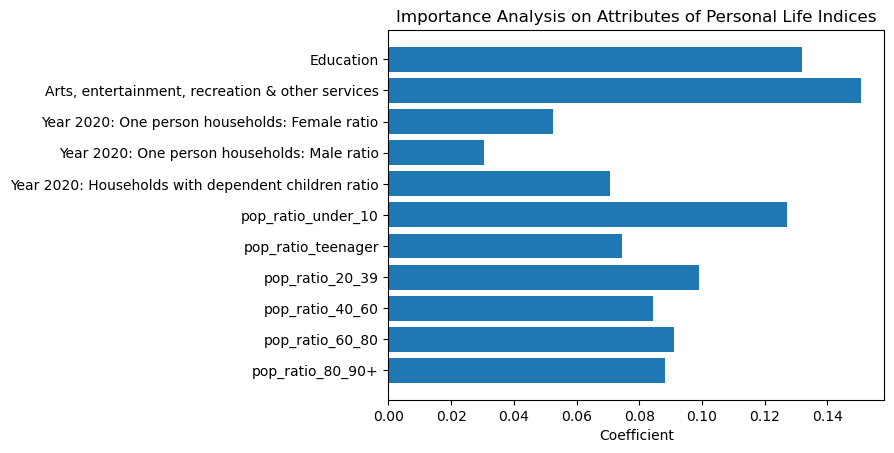

In [137]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x_names = list(pl_hundredYard_forest.feature_names_in_[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, pl_feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Personal Life Indices')
plt.savefig('Figure/personal_life_group_random_forest_importance_score_analysis.png')
plt.show()

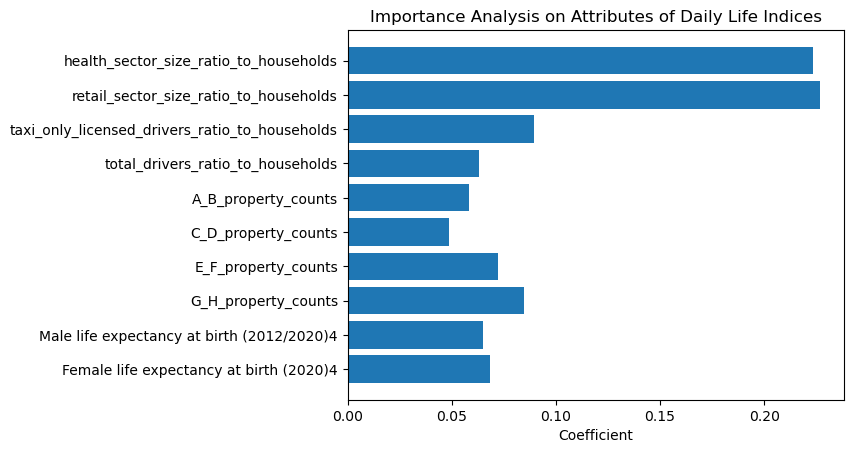

In [138]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x_names = list(dl_hundredYard_forest.feature_names_in_[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, dl_feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Daily Life Indices')
plt.savefig('Figure/daily_life_group_random_forest_importance_score_analysis.png')
plt.show()

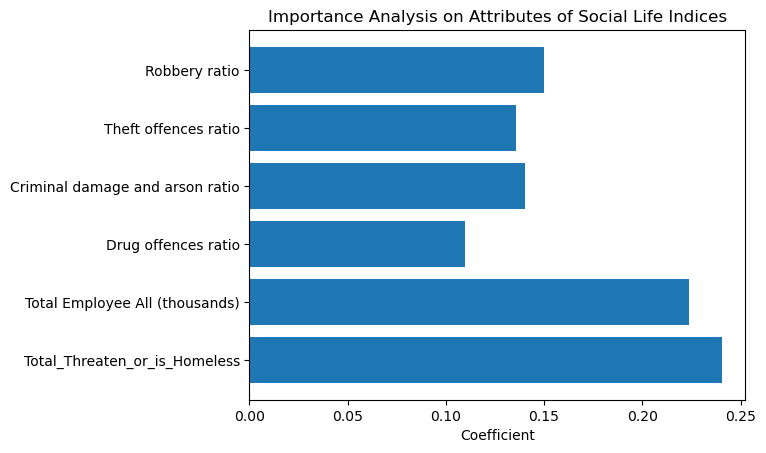

In [139]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x_names = list(sl_hundredYard_forest.feature_names_in_[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, sl_feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Social Life Indices')
plt.savefig('Figure/social_life_group_random_forest_importance_score_analysis.png')
plt.show()

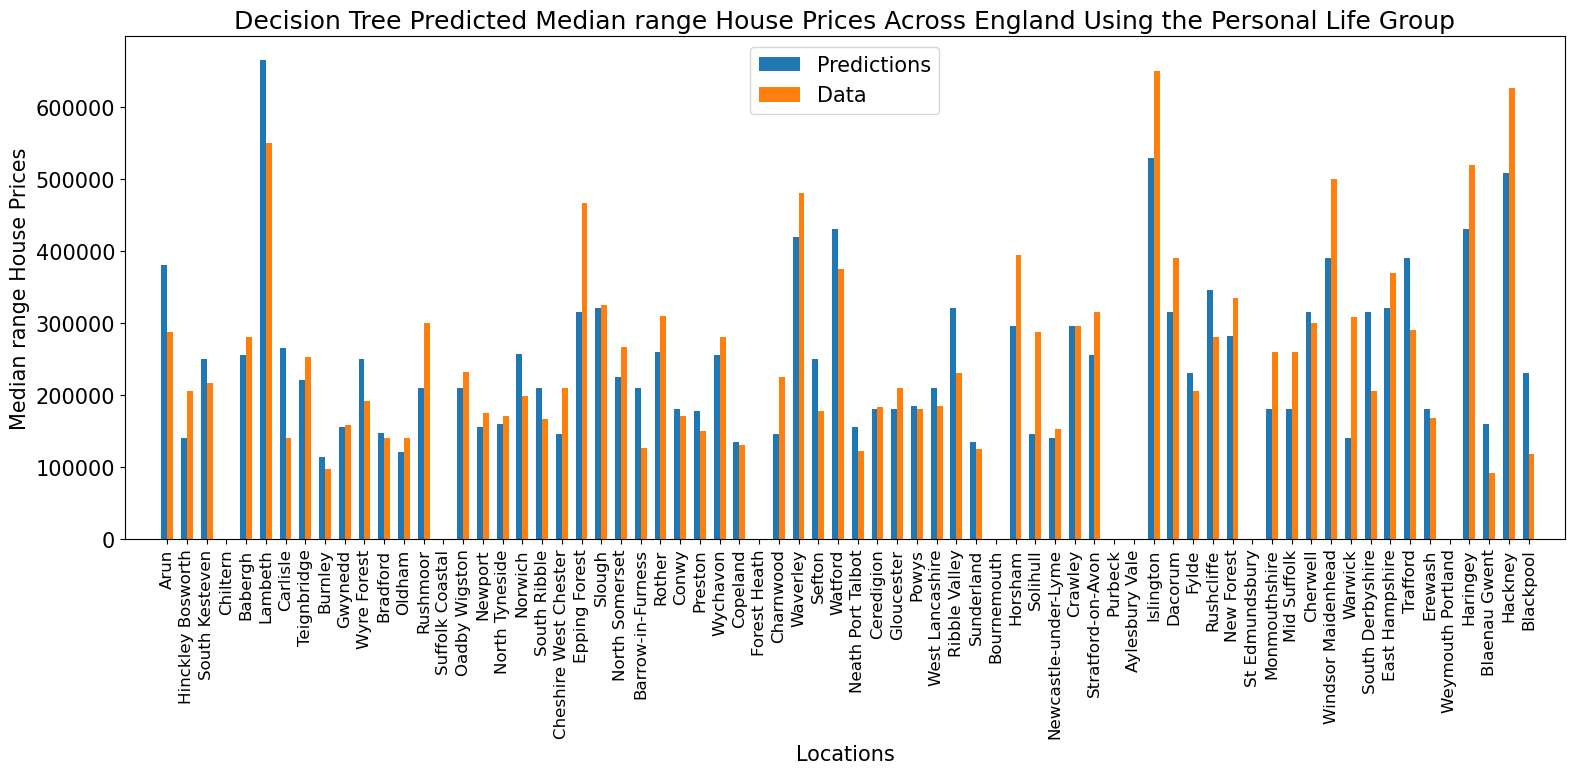

In [115]:
#Plot and save the test results
f_predictions = pl_predictions
test_y = test_pl_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Median range House Prices')
plt.title('Decision Tree Predicted Median range House Prices Across England Using the Personal Life Group')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_pl_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/pl_model_Random_forest_test_result.png')
plt.show()

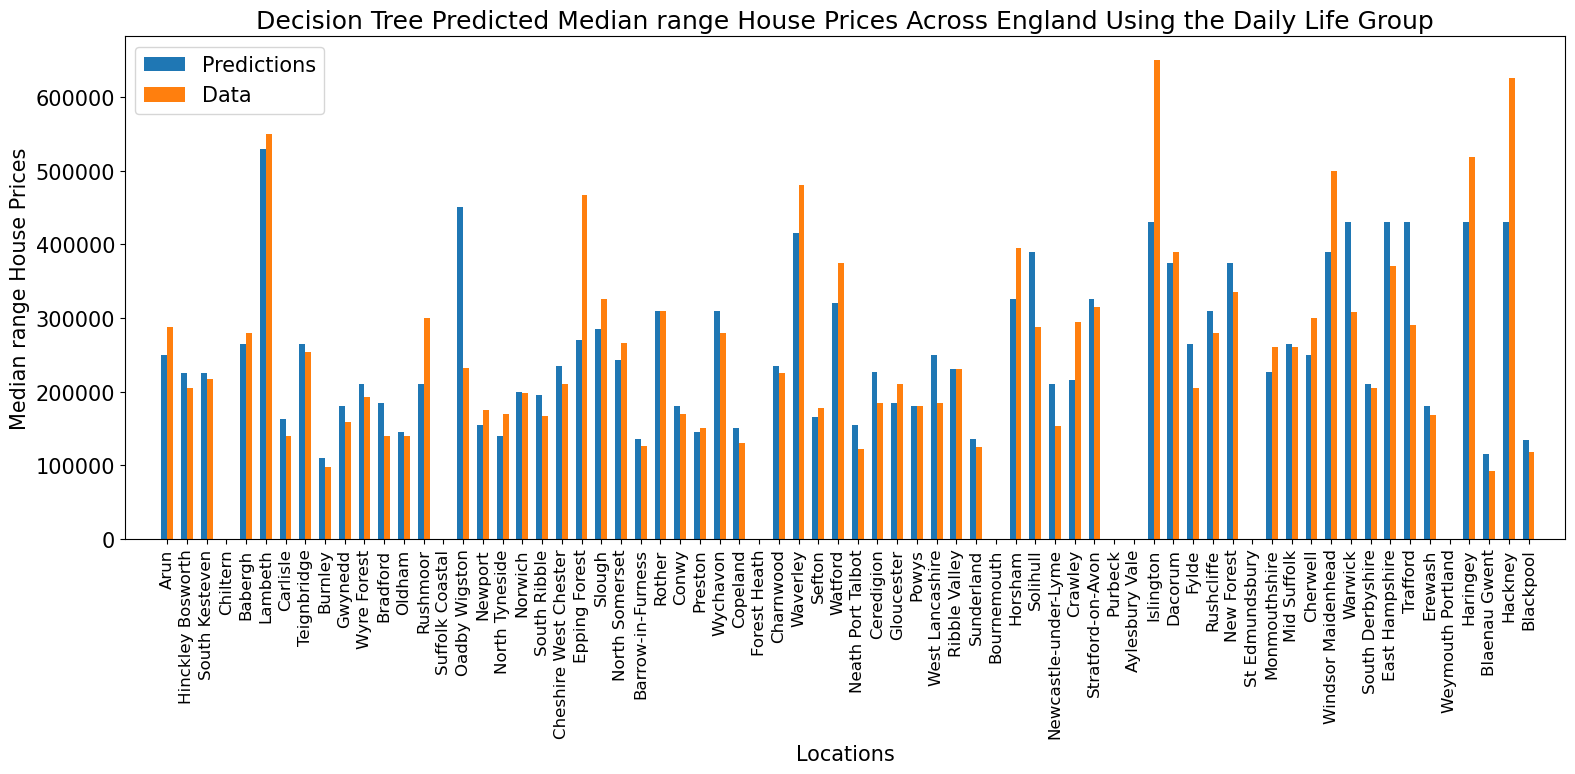

In [116]:
#Plot and save the test results
f_predictions = dl_predictions
test_y = test_dl_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Median range House Prices')
plt.title('Decision Tree Predicted Median range House Prices Across England Using the Daily Life Group')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_dl_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/dl_model_Random_forest_test_result.png')
plt.show()

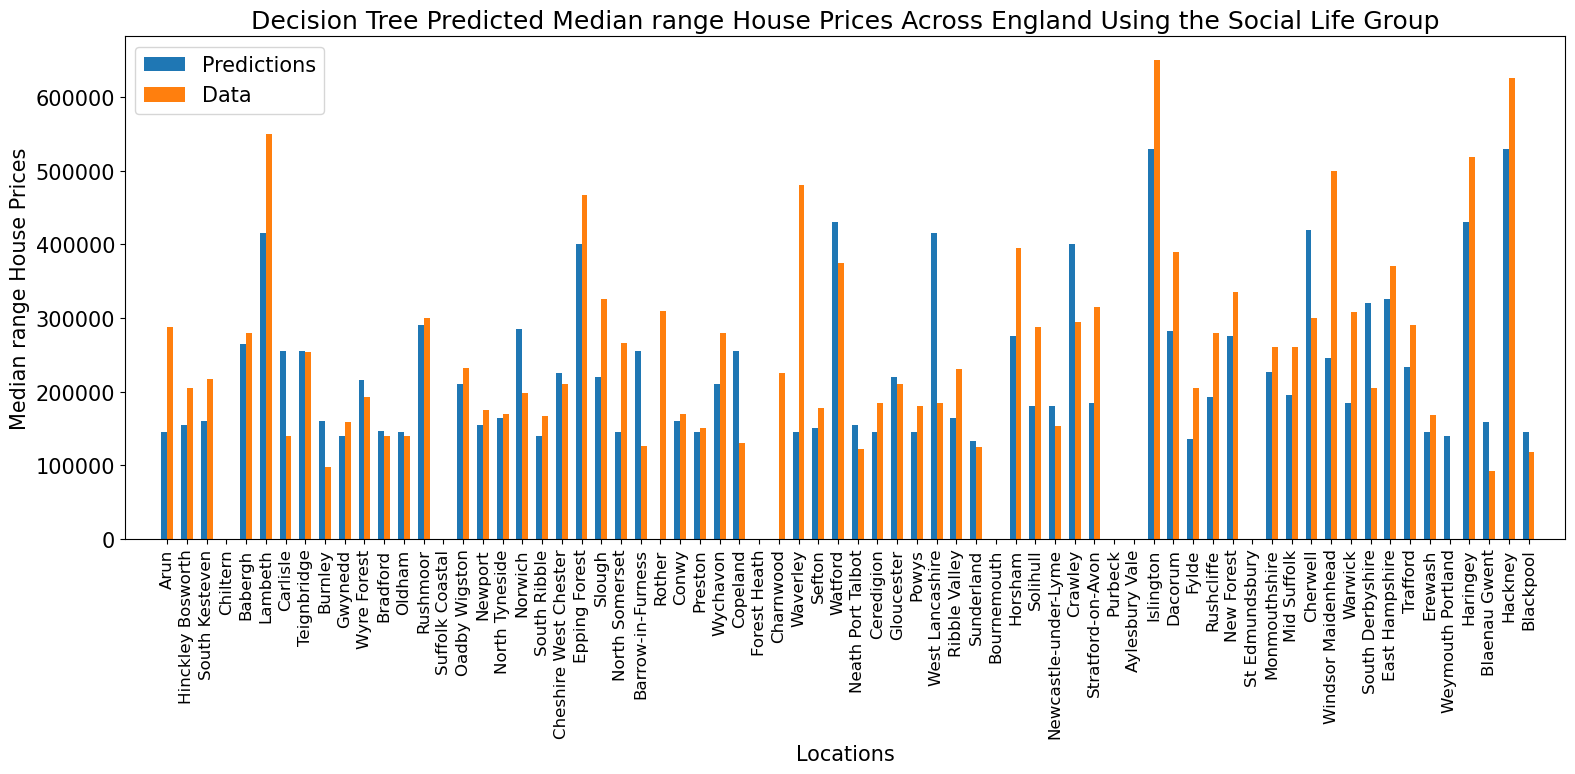

In [117]:
#Plot and save the test results
f_predictions = sl_predictions
test_y = test_sl_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Median range House Prices')
plt.title('Decision Tree Predicted Median range House Prices Across England Using the Social Life Group')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_sl_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/sl_model_Random_forest_test_result.png')
plt.show()